**Chapter 4 Time series features**

**4.1 Some simple statistics**

In [7]:

import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Loading and preprocessing steps
df = pd.read_csv('../Data/yaoko00006/yaoko00006.csv')
df['Date'] = pd.to_datetime(df['time'], unit='ms')


df.set_index('Date', inplace=True)
df.describe().T



,count,mean,std,min,25%,50%,75%,max
time,51072.0,1.668540e+12,2.655552e+10,1.622506e+12,1.645549e+12,1.668550e+12,1.691536e+12,1.714520e+12
solar,51072.0,8.205498e+00,1.281208e+01,0.000000e+00,0.000000e+00,1.000000e-03,1.297225e+01,4.969900e+01
power,51072.0,5.920927e+01,2.019562e+01,9.440000e-01,4.108775e+01,5.835850e+01,7.466225e+01,1.562510e+02
surplus,51072.0,1.125470e-04,4.584541e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.690000e-01
demand,51072.0,6.741465e+01,2.470510e+01,9.440000e-01,4.252500e+01,7.243400e+01,8.339900e+01,1.562510e+02
insolation,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count_solar,51072.0,2.999184e+01,4.300129e-01,1.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
count_power,51072.0,2.999170e+01,4.302607e-01,1.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
count_surplus,51072.0,2.999180e+01,4.298755e-01,1.000000e+00,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01


In [8]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Week'] = df.index.isocalendar().week  
df['DayOfWeek'] = df.index.dayofweek
df['Day'] = df.index.day
df['Hour'] = df.index.hour 
df['Minute'] = df.index.minute 

**4.2 ACF features**  

All the autocorrelations of a series can be considered features of that series. We can also summarise the autocorrelations to produce new features; for example, the sum of the first ten squared autocorrelation coefficients is a useful summary of how much autocorrelation there is in a series, regardless of lag.

We can also compute autocorrelations of the changes in the series between periods. That is, we “difference” the data and create a new time series consisting of the differences between consecutive observations. Then we can compute the autocorrelations of this new differenced series. Occasionally it is useful to apply the same differencing operation again, so we compute the differences of the differences. The autocorrelations of this double differenced series may provide useful information.

Another related approach is to compute seasonal differences of a series. If we had monthly data, for example, we would compute the difference between consecutive Januaries, consecutive Februaries, and so on. This enables us to look at how the series is changing between years, rather than between months. Again, the autocorrelations of the seasonally differenced series may provide useful information.

- the first autocorrelation coefficient from the original data;
- the sum of squares of the first ten autocorrelation coefficients from the original data;
- the first autocorrelation coefficient from the differenced data;
- the sum of squares of the first ten autocorrelation coefficients from the differenced data;
- the first autocorrelation coefficient from the twice differenced data;
- the sum of squares of the first ten autocorrelation coefficients from the twice differenced data;
- For seasonal data, the autocorrelation coefficient at the first seasonal lag is also returned.

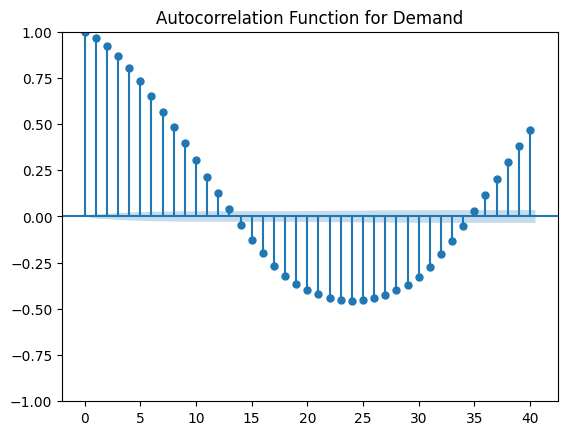

In [9]:
plot_acf(df['demand'], lags=40)  # Adjust the number of lags as needed
plt.title('Autocorrelation Function for Demand')
plt.show()

**4.3 STL Features**

In [15]:
# Perform STL decomposition
stl = STL(df['demand'], period=48*30)  
result = stl.fit()

# Access the individual components
seasonal = result.seasonal
trend = result.trend
residual = result.resid
observed = df['demand']



139.04114540426883


In [17]:
var_r = residual.var()
var_z = (seasonal+residual).var()
print("Seasonal Strength", 1 - (var_r/var_z))
var_r = residual.var()
var_z = (trend+residual).var()
print("Trend Strength", 1 - (var_r/var_z))

Seasonal Strength 0.9066518801286525
Trend Strength 0.6510782594271818


**4.4 Other features**